<a href="https://colab.research.google.com/github/WhiteBeyond/AI/blob/main/Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten,  LeakyReLU
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
%cd /content/drive/MyDrive/MidTerm/Food

/content/drive/MyDrive/MidTerm/Food


In [5]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [10]:
# Tạo bộ dữ liệu training set
training_set=train.flow_from_directory('/content/drive/MyDrive/MidTerm/Food/Train',target_size=(100,100), batch_size=32, class_mode='categorical')

Found 2865 images belonging to 10 classes.


In [11]:
training_set.class_indices

{'banh_bo': 0,
 'banh_bot_loc': 1,
 'banh_cong': 2,
 'banh_da_lon': 3,
 'banh_khot': 4,
 'banh_mi': 5,
 'banh_tai_heo': 6,
 'banh_tieu': 7,
 'banh_trung_thu': 8,
 'banh_xeo': 9}

In [12]:
# Tạo ra mạng CNN để train mô hình

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='linear', kernel_initializer='he_uniform', padding='same', input_shape=(100,100, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='linear', kernel_initializer='he_uniform', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='linear', kernel_initializer='he_uniform', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))



model.add(Flatten())  

model.add(Dense(128, activation='linear', kernel_initializer='he_uniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                  

In [13]:
# Gán biến lại để vẽ đồ thị, với 50 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), 
history=model.fit(training_set,epochs=20,batch_size=128,verbose=1)

Epoch 1/20
90/90 [==============================] - 1320s 15s/step - loss: 2.9943 - accuracy: 0.1742
Epoch 2/20
90/90 [==============================] - 45s 506ms/step - loss: 1.9111 - accuracy: 0.3253
Epoch 3/20
90/90 [==============================] - 45s 499ms/step - loss: 1.7416 - accuracy: 0.3962
Epoch 4/20
90/90 [==============================] - 46s 510ms/step - loss: 1.6217 - accuracy: 0.4429
Epoch 5/20
90/90 [==============================] - 45s 500ms/step - loss: 1.5079 - accuracy: 0.4764
Epoch 6/20
90/90 [==============================] - 45s 496ms/step - loss: 1.3850 - accuracy: 0.5298
Epoch 7/20
90/90 [==============================] - 44s 492ms/step - loss: 1.2738 - accuracy: 0.5620
Epoch 8/20
90/90 [==============================] - 45s 505ms/step - loss: 1.2315 - accuracy: 0.5801
Epoch 9/20
90/90 [==============================] - 45s 494ms/step - loss: 1.0927 - accuracy: 0.6297
Epoch 10/20
90/90 [==============================] - 44s 495ms/step - loss: 0.9968 - accura

In [14]:
model.save('/content/drive/MyDrive/MidTerm/Food/Food_model.h5')

In [15]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.26238805055618286
Train Accuracy 0.9120419025421143


<function matplotlib.pyplot.show(close=None, block=None)>

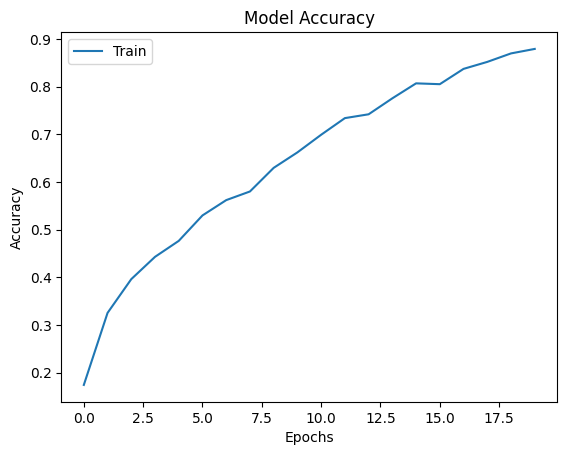

In [16]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train'])
plt.show

In [17]:
model1= load_model('/content/drive/MyDrive/MidTerm/Food/Food_model.h5')

1/1 [==============================] - 0s 277ms/step
banh_bo


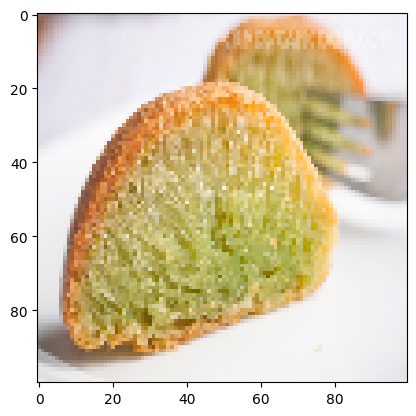

1/1 [==============================] - 0s 28ms/step
banh_bot_loc


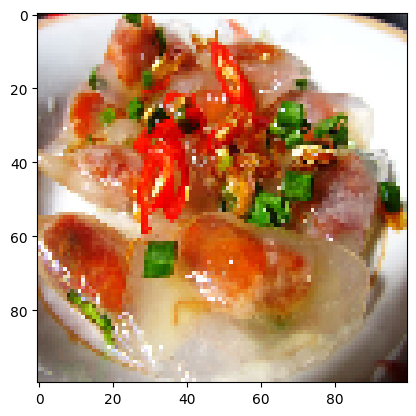

1/1 [==============================] - 0s 28ms/step
banh_cong


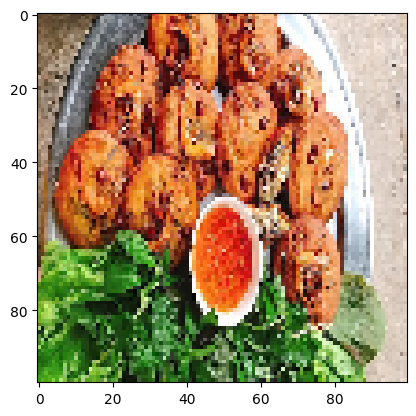

1/1 [==============================] - 0s 19ms/step
banh_da_lon


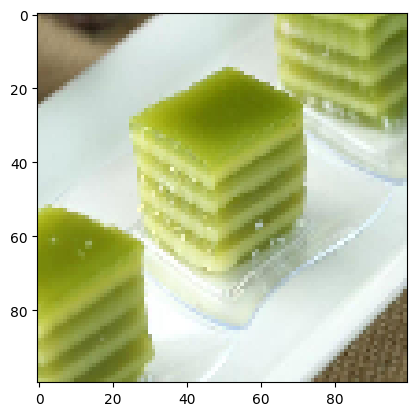

1/1 [==============================] - 0s 19ms/step
banh_khot


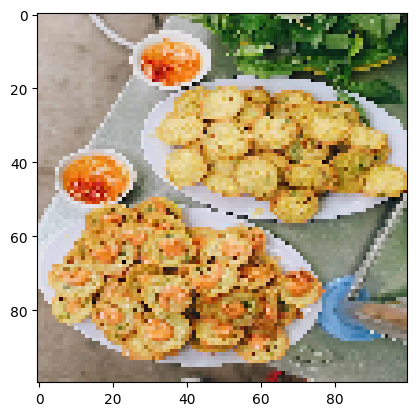

1/1 [==============================] - 0s 22ms/step
banh_mi


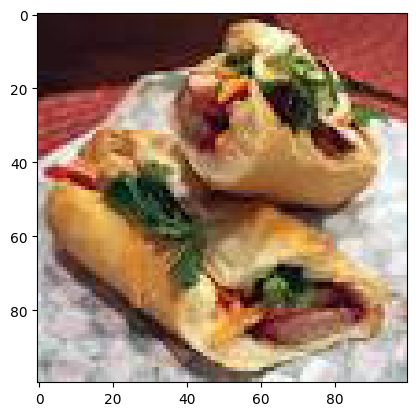

1/1 [==============================] - 0s 20ms/step
banh_tai_heo


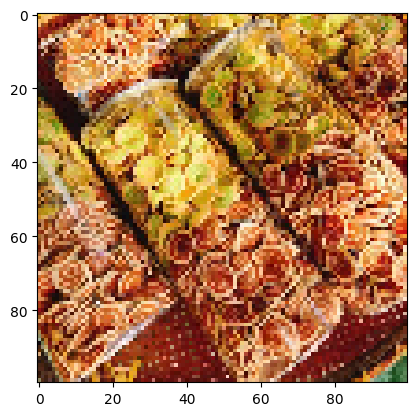

1/1 [==============================] - 0s 19ms/step
banh_tieu


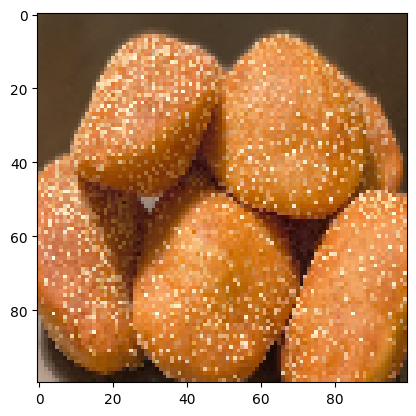

1/1 [==============================] - 0s 23ms/step
banh_trung_thu


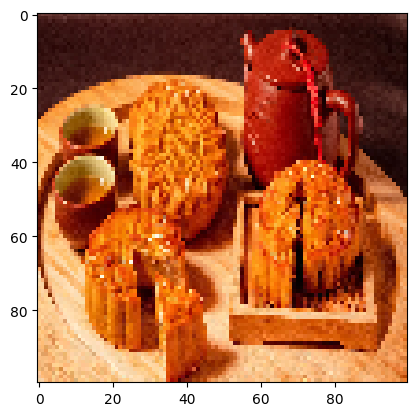

1/1 [==============================] - 0s 21ms/step
banh_xeo


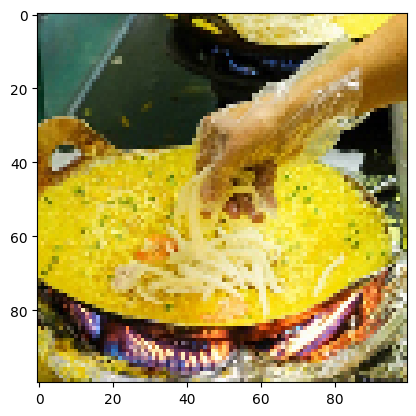

In [18]:
Test="/content/drive/MyDrive/MidTerm/Food/Test"

for i in os.listdir(Test):
  img=load_img(Test+'/'+i,target_size=(100,100))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model1.predict(img).argmax())
  class_name=['banh_bo','banh_bot_loc', 'banh_cong','banh_da_lon','banh_khot','banh_mi','banh_tai_heo','banh_tieu','banh_trung_thu','banh_xeo']
  print(class_name[result])
  plt.show()

